In [1]:
import gensim 
import logging
import warnings
import nltk
warnings.filterwarnings("ignore")
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Preprocessing

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
y_train = df_train['label']
y_test = df_test['label']

In [5]:
df_train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df_test.iloc[2]['tweet']

"i hope the guy won't say how come  only trump gets to speak his mind ð\x9f\x98\xad..people! enough with the pc already #sarcasmâ\x80¦ "

In [7]:
df_test.iloc[10]['tweet']

'  bihdayð\x9f\x92\x97                              ã\x80\x8c @user ã\x80\x8d '

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    # Change text to lower cases
    text = text.lower()
    # Remove all mentions
    text = re.sub(r'@[\w]*', ' ', text)
    # Remove all hashtags
    text = re.sub(r'#[\w]*', ' ', text)
    # Remove non-words using regular expressions
    text = re.sub(r'\W+',' ', text)
    # Remove digits
    text= re.sub(r'\d+', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    review = re.sub(r'^[a-zA-Z]\s+', ' ', text)
    review = re.sub(r'\s+[a-zA-Z]$', ' ', text)
    # Remove all non-alphanumeric chars
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^\s', '', text)
    text = re.sub(r'\s$', '', text)
    # Remove stop words and capture semantically related words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(w) for w in text.split() if w not in stopwords.words('english')]
    return text

In [9]:
x_test = [preprocess(x) for x in df_test['tweet']]
x_train = [preprocess(x) for x in df_train['tweet']]

In [10]:
x_train[:2]

[['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction'],
 ['thanks', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'van', 'pdx']]

# Training Word2Vec

In [11]:
model = gensim.models.Word2Vec(x_train, size=150, window=10, min_count=2, workers=10)
model.train(x_train, total_examples=len(x_train), epochs=10)

2020-11-15 19:12:04,355 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-11-15 19:12:04,356 : INFO : collecting all words and their counts
2020-11-15 19:12:04,357 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-15 19:12:04,368 : INFO : PROGRESS: at sentence #10000, processed 53624 words, keeping 10161 word types
2020-11-15 19:12:04,381 : INFO : PROGRESS: at sentence #20000, processed 106843 words, keeping 14811 word types
2020-11-15 19:12:04,384 : INFO : collected 15557 word types from a corpus of 117522 raw words and 21962 sentences
2020-11-15 19:12:04,385 : INFO : Loading a fresh vocabulary
2020-11-15 19:12:04,397 : INFO : effective_min_count=2 retains 7381 unique words (47% of original 15557, drops 8176)
2020-11-15 19:12:04,398 : INFO : effective_min_count=2 leaves 109346 word corpus (93% of original 117522, drops 8176)
2020-11-15 19:12:04,417 : INFO : deleting the raw counts dictionary of 15557 items
2020-11-

2020-11-15 19:12:06,033 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-11-15 19:12:06,039 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-11-15 19:12:06,041 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-11-15 19:12:06,041 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-11-15 19:12:06,043 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-11-15 19:12:06,044 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-11-15 19:12:06,045 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-11-15 19:12:06,046 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-11-15 19:12:06,048 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-11-15 19:12:06,052 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-11-15 19:12:06,053 : INFO : EPOCH - 2 : training on 117522 raw words (101879 effectiv

2020-11-15 19:12:06,523 : INFO : EPOCH - 9 : training on 117522 raw words (101836 effective words) took 0.1s, 1822408 effective words/s
2020-11-15 19:12:06,577 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-11-15 19:12:06,579 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-11-15 19:12:06,580 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-11-15 19:12:06,581 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-11-15 19:12:06,582 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-11-15 19:12:06,583 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-11-15 19:12:06,585 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-11-15 19:12:06,585 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-11-15 19:12:06,587 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-11-15 19:12:06,589 : INFO : worker threa

(1018679, 1175220)

In [12]:
model.wv.most_similar(positive=['hate'])

2020-11-15 19:12:06,596 : INFO : precomputing L2-norms of word weight vectors


[('people', 0.95253586769104),
 ('gossiping', 0.9514404535293579),
 ('gay', 0.9339461326599121),
 ('gun', 0.9207468032836914),
 ('act', 0.9086148738861084),
 ('orlando', 0.9081928133964539),
 ('america', 0.9073865413665771),
 ('jackal', 0.9071587324142456),
 ('senseless', 0.9066610932350159),
 ('control', 0.904619574546814)]

In [13]:
model.wv.most_similar(positive=['like'])

[('clap', 0.9058827757835388),
 ('feel', 0.9015352725982666),
 ('annoy', 0.8740800619125366),
 ('atitude', 0.8686262965202332),
 ('stomping', 0.8662048578262329),
 ('bcuz', 0.8489590883255005),
 ('queenanelisse', 0.8436598777770996),
 ('listen', 0.8404889106750488),
 ('adele', 0.83894944190979),
 ('nothing', 0.8361157774925232)]

In [14]:
model.wv.most_similar(positive=['love', 'life'], negative=['hate'])

[('out', 0.9062116146087646),
 ('daughter', 0.9028024077415466),
 ('gift', 0.8819011449813843),
 ('dedication', 0.8809494972229004),
 ('enjoy', 0.8804731965065002),
 ('shyan', 0.8715202808380127),
 ('dad', 0.870765209197998),
 ('thanku', 0.8657667636871338),
 ('horizon', 0.8652190566062927),
 ('active', 0.8631535768508911)]

# Most common words used for hatred sentiments

In [15]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/luxuzheng/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [16]:
from nltk.book import FreqDist

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [17]:
x_train_hatred = []
x_train_non_hatred = []
for x, y in zip(x_train, y_train):
    if y:
        x_train_hatred.extend(x)
    else:
        x_train_non_hatred.extend(x)

In [18]:
fdist_hatred = FreqDist(x_train_hatred)
hatred = np.array(sorted(fdist_hatred.items(), key=lambda d:d[1], reverse=True)[:10])
hatred

array([['amp', '204'],
       ['white', '100'],
       ['like', '94'],
       ['woman', '74'],
       ['racist', '70'],
       ['black', '69'],
       ['people', '58'],
       ['trump', '56'],
       ['might', '52'],
       ['libtard', '48']], dtype='<U7')

In [19]:
fdist_non_hatred = FreqDist(x_train_non_hatred)
non_hatred = np.array(sorted(fdist_non_hatred.items(), key=lambda d:d[1], reverse=True)[:10])
non_hatred

array([['day', '1787'],
       ['happy', '1064'],
       ['amp', '1027'],
       ['love', '849'],
       ['time', '800'],
       ['today', '713'],
       ['get', '662'],
       ['like', '591'],
       ['new', '584'],
       ['life', '564']], dtype='<U5')

# Plot bar graph

2020-11-15 19:12:11,891 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-15 19:12:11,892 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-15 19:12:11,909 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-15 19:12:11,910 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


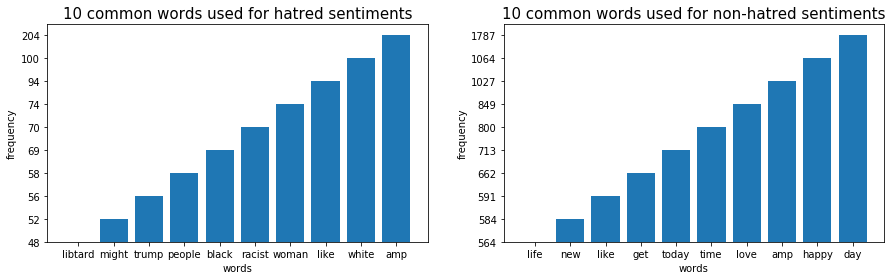

In [20]:
import matplotlib
import matplotlib.pyplot as plt

# Show plot
fig = plt.figure(0, figsize=(15, 4))
plt.tight_layout()

# 10 common words used for hatred sentiments
ax1 = fig.add_subplot(121)
ax1.bar(hatred[::-1,0], hatred[::-1,1])
ax1.set_xlabel('words')
ax1.set_ylabel('frequency')
ax1.set_title('10 common words used for hatred sentiments', fontsize=15)

# 10 common words used for non-hatred sentiments
ax2 = fig.add_subplot(122)
ax2.bar(non_hatred[::-1,0], non_hatred[::-1,1])
ax2.set_xlabel('words')
ax2.set_ylabel('frequency')
ax2.set_title('10 common words used for non-hatred sentiments', fontsize=15)

plt.show()

# Create features

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import re
import gensim 
import logging
import warnings
import nltk
warnings.filterwarnings("ignore")
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [22]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    # Change text to lower cases
    text = text.lower()
    # Remove all mentions
    text = re.sub(r'@[\w]*', ' ', text)
    # Remove all hashtags
    text = re.sub(r'#[\w]*', ' ', text)
    # Remove non-words using regular expressions
    text = re.sub(r'\W+',' ', text)
    # Remove digits
    text= re.sub(r'\d+', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    review = re.sub(r'^[a-zA-Z]\s+', ' ', text)
    review = re.sub(r'\s+[a-zA-Z]$', ' ', text)
    # Remove all non-alphanumeric chars
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^\s', '', text)
    text = re.sub(r'\s$', '', text)
    # Remove stop words and capture semantically related words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(w) for w in text.split() if w not in stopwords.words('english')]
    return ' '.join(text)

In [23]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
x_test = [preprocess(x) for x in df_test['tweet']]
x_train = [preprocess(x) for x in df_train['tweet']]
y_train = df_train['label']
y_test = df_test['label']
print(len(y_train), len(y_test))

21962 10000


# Binary Bag-of-word features

In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
x_train_bag_word = np.where(vectorizer.transform(x_train).toarray() >= 1, 1, 0)
x_test_bag_word = np.where(vectorizer.transform(x_test).toarray() >= 1, 1, 0)
print(x_train_bag_word.shape, x_test_bag_word.shape)

(21962, 15536) (10000, 15536)


# Binary Bag-of-unigram features

In [25]:
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b', min_df=1)
unigram_vectorizer.fit(x_train)
x_train_bag_unigram = unigram_vectorizer.transform(x_train).toarray()
x_train_bag_unigram = np.where(x_train_bag_unigram >= 1, 1, 0)
x_test_bag_unigram = unigram_vectorizer.transform(x_test).toarray()
x_test_bag_unigram = np.where(x_test_bag_unigram >= 1, 1, 0)
print(x_train_bag_unigram.shape, x_test_bag_unigram.shape)

(21962, 15557) (10000, 15557)


# Binary Bag-of-bigram features

In [26]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b', min_df=1)
bigram_vectorizer.fit(x_train)
x_train_bag_bigram = bigram_vectorizer.transform(x_train).toarray()
x_train_bag_bigram = np.where(x_train_bag_bigram >= 1, 1, 0)
x_test_bag_bigram = bigram_vectorizer.transform(x_test).toarray()
x_test_bag_bigram = np.where(x_test_bag_bigram >= 1, 1, 0)
print(x_train_bag_bigram.shape, x_test_bag_bigram.shape)

(21962, 71747) (10000, 71747)


# Binary Bag-of-ngram features (both unigrams and bigrams)

In [27]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
ngram_vectorizer.fit(x_train)
x_train_bag_ngram = ngram_vectorizer.transform(x_train).toarray()
x_train_bag_ngram = np.where(x_train_bag_ngram >= 1, 1, 0)
x_test_bag_ngram = ngram_vectorizer.transform(x_test).toarray()
x_test_bag_ngram = np.where(x_test_bag_ngram >= 1, 1, 0)
print(x_train_bag_ngram.shape, x_test_bag_ngram.shape)

(21962, 87304) (10000, 87304)


# Naive Bayes Classifier
## binary bag-of-unigrams features

In [28]:
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score

In [29]:
clf = MultinomialNB(alpha=1)
clf.fit(x_train_bag_unigram, y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [30]:
y_pred = clf.predict(x_test_bag_unigram)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7160
Accuracy: 94.44%


## binary bag-of-bigrams features

In [31]:
clf = MultinomialNB(alpha=1)
clf.fit(x_train_bag_bigram, y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [32]:
y_pred = clf.predict(x_test_bag_bigram)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7117
Accuracy: 94.85%


## binary bag-of-ngrams features (both unigrams and bigrams)

In [33]:
clf = MultinomialNB(alpha=1)
clf.fit(x_train_bag_ngram, y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [34]:
y_pred = clf.predict(x_test_bag_ngram)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7218
Accuracy: 94.95%


# Logistic Regression
## binary bag-of-words features

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression(penalty='l2')
clf.fit(x_train_bag_word, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = clf.predict(x_test_bag_word)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7281
Accuracy: 94.75%


## binary bag-of-unigrams features

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression(penalty='l2')
clf.fit(x_train_bag_unigram, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = clf.predict(x_test_bag_unigram)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7270
Accuracy: 94.73%


## binary bag-of-bigrams features

In [41]:
clf = LogisticRegression(penalty='l2')
clf.fit(x_train_bag_bigram, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = clf.predict(x_test_bag_bigram)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.6482
Accuracy: 94.19%


## binary bag-of-ngrams features (both unigrams and bigrams)

In [43]:
clf = LogisticRegression(penalty='l2')
clf.fit(x_train_bag_ngram, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = clf.predict(x_test_bag_ngram)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7399
Accuracy: 95.02%


# A logistic regression classifier with Naïve Bayes features
## Get log-count ratio vector of bag-of-words features

In [45]:
p = np.ones(x_train_bag_word.shape[1])
q =  np.ones(x_train_bag_word.shape[1])
for x, y in zip(x_train_bag_word, y_train):
    if y == 1:
        p += x
    else:
        q += x

In [46]:
r = np.log((p/p.sum())/(q/q.sum()))

## Element-wise product of the logcount ratio vector and  bag-of-words features

In [47]:
x_train_bag_word_nb = np.multiply(x_train_bag_word, r)
x_test_bag_word_nb = np.multiply(x_test_bag_word, r)

## Get log-count ratio vector of bag-of-ngrams features (both unigrams and bigrams)

In [48]:
p = np.ones(x_train_bag_ngram.shape[1])
q =  np.ones(x_train_bag_ngram.shape[1])
for x, y in zip(x_train_bag_ngram, y_train):
    if y == 1:
        p += x
    else:
        q += x

In [49]:
r = np.log((p/p.sum())/(q/q.sum()))

## Element-wise product of the logcount ratio vector and bag-of-ngrams features

In [50]:
x_train_bag_ngram_nb = np.multiply(x_train_bag_ngram, r)
x_test_bag_ngram_nb = np.multiply(x_test_bag_ngram, r)

# Logistic Regression (with Naïve Bayes features)
## bag-of-words features

In [51]:
clf = LogisticRegression(penalty='l2')
clf.fit(x_train_bag_word_nb, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = clf.predict(x_test_bag_word_nb)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7462
Accuracy: 94.99%


## bag-of-ngrams features (both unigrams and bigrams)

In [53]:
clf = LogisticRegression(penalty='l2')
clf.fit(x_train_bag_ngram_nb, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = clf.predict(x_test_bag_ngram_nb)
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

F1 Score: 0.7481
Accuracy: 95.26%
